In [1]:

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from os.path import expanduser
home = expanduser("~")
sys.path.insert(1, f"{home}/catkin_ws/src/emotion_classification/src")
sys.path.insert(2, f"{home}/catkin_ws/src/neurocontroller_database/src")
from utilities import load_json, root_dir, users_adquisition, color_axes
from distributions import plot_distributions, get_distributions
from load_bci_results import get_data_experiments

range_final = [0,.8]


# ruta del nodo neurocntroller_database
split_path = root_dir.split("/")[:-1]
path_node = "/".join(split_path)

# ruta de los datos
root_db = f"{path_node}/database"

NEUROCONTROLADORES

In [2]:

data_exp = get_data_experiments("individuo")
data_exp[:3]

-- user1
-- user_test
Num Columnas 9
[('id pareto', 'SIZE: 44'), ('num ind', 'SIZE: 44'), ('num exp', 'SIZE: 44'), ('usuario', 'SIZE: 44'), ('type experiment', 'SIZE: 44'), ('id experiment', 'SIZE: 44'), ('PBI SAM', 'SIZE: 44'), ('valence SAM', 'SIZE: 44'), ('arousal SAM', 'SIZE: 44')]


,id pareto,num ind,num exp,usuario,type experiment,id experiment,PBI SAM,valence SAM,arousal SAM
0,optimized-8,35.0,1.0,user1,traditional,0,0.448474,0.0,0.0
1,optimized-17,11.0,2.0,user1,traditional,0,0.448474,0.0,0.0
2,optimized-22,6.0,3.0,user1,traditional,0,0.448474,0.0,0.0


In [3]:


fig = px.scatter(data_exp, y="arousal SAM", x="valence SAM", color="usuario", custom_data=['id pareto'])
fig.update_traces(marker_size=10)
fig.update_traces(hovertemplate="<br>".join(["valence: %{x}", "arousal: %{y}", "pareto: %{customdata[0]}"]))
fig.add_shape(type="line", x0=0.5, y0=0, x1=0.5,y1=1, xref='x', yref='y', line=dict(color=color_axes,))
fig.add_shape(type="line", x0=0, y0=0.5, x1=1,y1=0.5, xref='x', yref='y', line=dict(color=color_axes,))
fig.add_shape(type="circle", x0=0, y0=0, x1=1, y1=1, line=dict(color=color_axes),)
fig.update_yaxes(scaleanchor="x", scaleratio=1,)
fig.update_layout(showlegend=True)
fig.show()
# fig.write_image(f"{dir_out}/neurocontrollers_by_users.pdf")


fig = px.scatter(data_exp, y="arousal SAM", x="valence SAM", color="id pareto", custom_data=['usuario'])
fig.update_traces(marker_size=10)
fig.update_traces(hovertemplate="<br>".join(["valence: %{x}", "arousal: %{y}", "usuario: %{customdata[0]}"]))
fig.add_shape(type="line", x0=0.5, y0=0, x1=0.5,y1=1, xref='x', yref='y', line=dict(color=color_axes,))
fig.add_shape(type="line", x0=0, y0=0.5, x1=1,y1=0.5, xref='x', yref='y', line=dict(color=color_axes,))
fig.add_shape(type="circle", x0=0, y0=0, x1=1, y1=1, line=dict(color=color_axes),)
fig.update_yaxes(scaleanchor="x", scaleratio=1,)
fig.update_layout(showlegend=True)
fig.show()
# fig.write_image(f"{dir_out}/neurocontrollers_by_front.pdf")


---- Global
dist_valence {'values': ['0', '1'], 'distribution': [0.4772727272727273, 0.5227272727272727]}
dist_arousal {'values': ['0', '1'], 'distribution': [0.4090909090909091, 0.5909090909090909]}
dist_class {'values': ['0', '1', '2', '3'], 'distribution': [0.4772727272727273, 0.11363636363636363, 0.36363636363636365, 0.045454545454545456]}


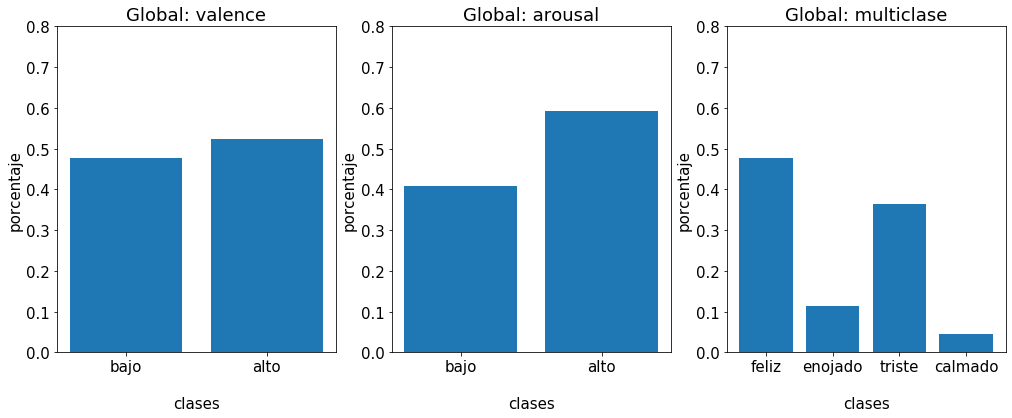

---- user1
dist_valence {'values': ['0', '1'], 'distribution': [0.5882352941176471, 0.4117647058823529]}
dist_arousal {'values': ['0', '1'], 'distribution': [0.4117647058823529, 0.5882352941176471]}
dist_class {'values': ['0', '1', '2', '3'], 'distribution': [0.29411764705882354, 0.29411764705882354, 0.29411764705882354, 0.11764705882352941]}


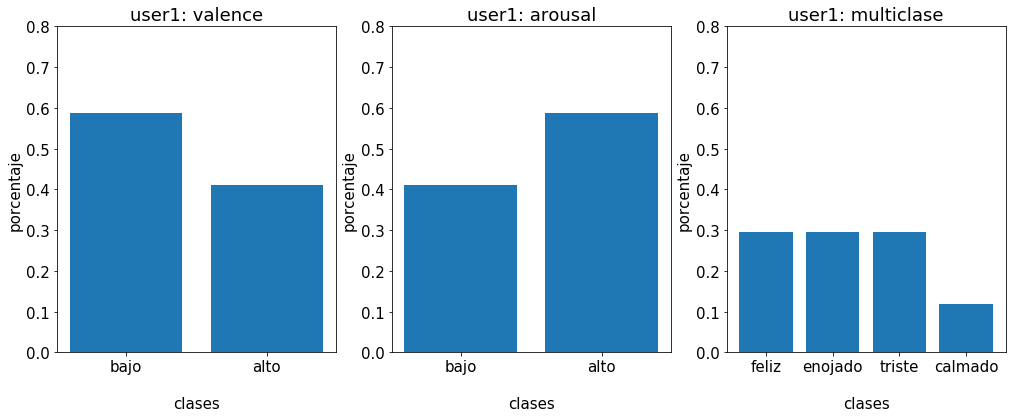

---- user_test
dist_valence {'values': ['0', '1'], 'distribution': [0.4074074074074074, 0.5925925925925926]}
dist_arousal {'values': ['0', '1'], 'distribution': [0.4074074074074074, 0.5925925925925926]}
dist_class {'values': ['0', '1', '2', '3'], 'distribution': [0.5925925925925926, 0.0, 0.4074074074074074, 0.0]}


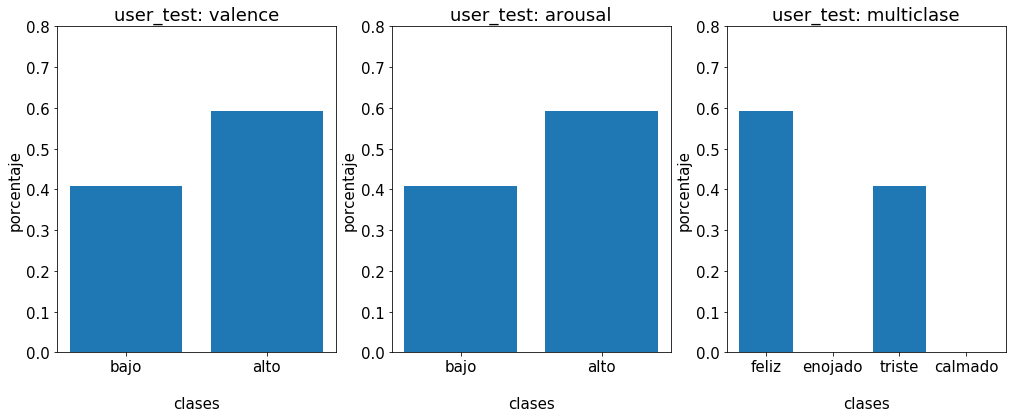

In [8]:
dir_out = f"./class_distribution/optimized"
user_unique = np.unique(data_exp["usuario"])
label_name = ["valence SAM", "arousal SAM"]

print("---- Global")
# distibución global
valence, arousal, emo_class = get_distributions(data_exp[label_name].to_numpy())
plot_distributions("Global", valence, arousal, emo_class, dir_out, range_final)


for user_name in user_unique:
    print("----", user_name)
    labels = data_exp.loc[data_exp["usuario"] == user_name]
    labels = labels[label_name].to_numpy()
    # print(labels)
    # break
    # distribuciones
    valence, arousal, emo_class = get_distributions(labels)
    plot_distributions(user_name, valence, arousal, emo_class, dir_out, range_final)

diferencia entre el promedio con TODAS las muestras y el promedio con subconjuntos de las muestras

In [5]:
# def calculate_optimized_dist():
#     dir_out = f"./class_distribution/optimized"

#     gloval_v = np.empty((0,2))
#     gloval_a = np.empty((0,2))
#     gloval_mc = np.empty((0,4))
#     id_fronts = []
#     user_reg = []

#     labels_global = np.empty((0,2))

#     for user in users_adquisition:
#         print(user)
#         user_name = user["name"]
#         dir_opt = f"{root_dir}/{user_name}/history/emotion_evaluation.txt"
#         emo_data = load_json(dir_opt)
        
#         if(len(emo_data) == 0): continue

#         labels = np.empty((0,2))

#         # por id_pareto
#         for id_pareto in emo_data.keys():
#             # por num_ind
#             for id_ind in emo_data[id_pareto].keys():
#                 # print(emo_data[id_pareto][id_ind])
#                 # por storage_pos (experiment dat)
#                 for storage_pos in emo_data[id_pareto][id_ind].keys():
#                 # for n_exp, emo_val in enumerate(emo_data[id_pareto][id_ind]):
#                     # if has_attr(data_exp, "emotion_evaluation"):
#                     #     emo_val = data_exp["emotion_evaluation"]

#                     emo_val = emo_data[id_pareto][id_ind][storage_pos]
#                     labels = np.vstack((labels, [emo_val["valence"], emo_val["arousal"]]))
                    
#                     str_id = id_pareto
#                     if len(emo_data[id_pareto][id_ind]) > 1:
#                         str_id = f"{id_pareto}/exp_{storage_pos}"
#                     id_fronts.append(str_id)
#                     user_reg.append(user_name)

#         labels_global = np.vstack((labels_global, labels))
        
#         # distribuciones
#         valence, arousal, emo_class = get_distributions(labels)
#         plot_distributions(user_name, valence, arousal, emo_class, dir_out, [0,1])

#         gloval_v = np.vstack((gloval_v, valence["distribution"]))
#         gloval_a = np.vstack((gloval_a, arousal["distribution"]))
#         gloval_mc = np.vstack((gloval_mc, emo_class["distribution"]))

#     # promedios
#     two_class = np.arange(2).astype(str)
#     valence = {"values": two_class, "distribution": gloval_v.mean(axis=0)}
#     arousal = {"values": two_class, "distribution": gloval_a.mean(axis=0)}
#     emo_class = {"values": np.arange(4).astype(str), "distribution": gloval_mc.mean(axis=0)}
#     plot_distributions("Autoevaluación BCI", valence, arousal, emo_class, dir_out, range_final)
#     plt.show()

#     # guardado
#     dir_out = "./emotional_self-assessment"
#     if not os.path.isdir(dir_out):
#         os.makedirs(dir_out)

#     df = pd.DataFrame({"valence": labels_global[:,0], "arousal":labels_global[:,1], "usuario": user_reg, "pareto": id_fronts})
#     fig = px.scatter(df, y="arousal", x="valence", color="usuario", custom_data=['pareto'])
#     fig.update_traces(marker_size=10)
#     fig.update_traces(hovertemplate="<br>".join(["valence: %{x}", "arousal: %{y}", "pareto: %{customdata[0]}"]))
#     fig.add_shape(type="line", x0=0.5, y0=0, x1=0.5,y1=1, xref='x', yref='y', line=dict(color=color_axes,))
#     fig.add_shape(type="line", x0=0, y0=0.5, x1=1,y1=0.5, xref='x', yref='y', line=dict(color=color_axes,))
#     fig.add_shape(type="circle", x0=0, y0=0, x1=1, y1=1, line=dict(color=color_axes),)
#     fig.update_yaxes(scaleanchor="x", scaleratio=1,)
#     fig.update_layout(showlegend=True)
#     fig.show()
#     fig.write_image(f"{dir_out}/neurocontrollers_by_users.pdf")


#     fig = px.scatter(df, y="arousal", x="valence", color="pareto", custom_data=['usuario'])
#     fig.update_traces(marker_size=10)
#     fig.update_traces(hovertemplate="<br>".join(["valence: %{x}", "arousal: %{y}", "usuario: %{customdata[0]}"]))
#     fig.add_shape(type="line", x0=0.5, y0=0, x1=0.5,y1=1, xref='x', yref='y', line=dict(color=color_axes,))
#     fig.add_shape(type="line", x0=0, y0=0.5, x1=1,y1=0.5, xref='x', yref='y', line=dict(color=color_axes,))
#     fig.add_shape(type="circle", x0=0, y0=0, x1=1, y1=1, line=dict(color=color_axes),)
#     fig.update_yaxes(scaleanchor="x", scaleratio=1,)
#     fig.update_layout(showlegend=True)
#     fig.show()
#     fig.write_image(f"{dir_out}/neurocontrollers_by_front.pdf")
    

# calculate_optimized_dist()